# Download the Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Flowers-Dataset

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

In [ ]:
cd /content/drive/Mydrive/Datasets

[Errno 2] No such file or directory: '/content/drive/Mydrive/Datasets'
/content


# Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
xtrain = train_datagen.flow_from_directory(r'/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtest = test_datagen.flow_from_directory(r'/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [ ]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Create Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

#Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

Convolution

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

Pooling

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

Flatten

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                        

Dense/ Hidden Layers

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(5,activation='softmax'))

In [ ]:
32*(3*3*3+1)

896

# Compile the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
len(xtrain)

44

# Fit the model

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
44/44 [==============================] - 47s 1s/step - loss: 1.4557 - accuracy: 0.4070 - val_loss: 1.1758 - val_accuracy: 0.5281
Epoch 2/10
44/44 [==============================] - 46s 1s/step - loss: 1.0940 - accuracy: 0.5659 - val_loss: 1.0582 - val_accuracy: 0.5916
Epoch 3/10
44/44 [==============================] - 47s 1s/step - loss: 0.9990 - accuracy: 0.6134 - val_loss: 0.9479 - val_accuracy: 0.6308
Epoch 4/10
44/44 [==============================] - 45s 1s/step - loss: 0.9259 - accuracy: 0.6440 - val_loss: 0.9026 - val_accuracy: 0.6544
Epoch 5/10
44/44 [==============================] - 45s 1s/step - loss: 0.8720 - accuracy: 0.6650 - val_loss: 0.8949 - val_accuracy: 0.6546
Epoch 6/10
44/44 [==============================] - 47s 1s/step - loss: 0.8400 - accuracy: 0.6711 - val_loss: 0.8580 - val_accuracy: 0.6715
Epoch 7/10
44/44 [==============================] - 45s 1s/step - loss: 0.7916 - accuracy: 0.6947 - val_loss: 0.7178 - val_accuracy: 0.7281
Epoch 8/10
44/44 [==

# Saving the model




In [ ]:
model.save('Flowers.h5')

In [ ]:
ls

drive/  flowers/  Flowers.h5  sample_data/


# Testing the model

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img1 = image.load_img(r'/content/flowers/tulip/107693873_86021ac4ea_n.jpg')

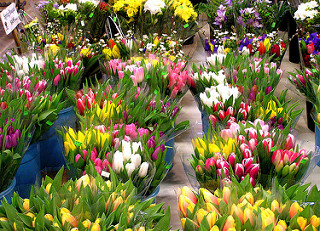

In [ ]:
img1

In [ ]:
img1 = image.load_img(r'/content/flowers/tulip/107693873_86021ac4ea_n.jpg', target_size=(64, 64))

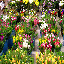

In [ ]:
img1

In [ ]:
x = image.img_to_array(img1)
x

array([[[141.,  85.,  50.],
        [159., 102.,  85.],
        [132.,  88.,  63.],
        ...,
        [101.,  73.,  59.],
        [251., 255., 237.],
        [ 88.,  83.,  15.]],

       [[ 82.,  54.,  42.],
        [  6.,   4.,  41.],
        [250., 244., 255.],
        ...,
        [240., 220., 134.],
        [236., 238., 199.],
        [255., 249., 255.]],

       [[128.,  79., 111.],
        [238., 235., 226.],
        [169., 155., 188.],
        ...,
        [174., 185.,  46.],
        [120., 126.,  90.],
        [ 54.,  49.,   0.]],

       ...,

       [[134., 160.,  73.],
        [ 91., 127.,  63.],
        [ 63.,  93.,  23.],
        ...,
        [ 51.,  59.,  22.],
        [244., 145.,  64.],
        [242., 211.,   9.]],

       [[ 83., 118.,  36.],
        [ 77., 108.,  38.],
        [ 57.,  82.,  16.],
        ...,
        [129., 116.,  46.],
        [228., 190.,  65.],
        [212., 172.,  14.]],

       [[ 95., 118.,  36.],
        [ 81., 104.,  13.],
        [ 24.,  

In [ ]:
x=np.expand_dims(x,axis=0)
x

array([[[[141.,  85.,  50.],
         [159., 102.,  85.],
         [132.,  88.,  63.],
         ...,
         [101.,  73.,  59.],
         [251., 255., 237.],
         [ 88.,  83.,  15.]],

        [[ 82.,  54.,  42.],
         [  6.,   4.,  41.],
         [250., 244., 255.],
         ...,
         [240., 220., 134.],
         [236., 238., 199.],
         [255., 249., 255.]],

        [[128.,  79., 111.],
         [238., 235., 226.],
         [169., 155., 188.],
         ...,
         [174., 185.,  46.],
         [120., 126.,  90.],
         [ 54.,  49.,   0.]],

        ...,

        [[134., 160.,  73.],
         [ 91., 127.,  63.],
         [ 63.,  93.,  23.],
         ...,
         [ 51.,  59.,  22.],
         [244., 145.,  64.],
         [242., 211.,   9.]],

        [[ 83., 118.,  36.],
         [ 77., 108.,  38.],
         [ 57.,  82.,  16.],
         ...,
         [129., 116.,  46.],
         [228., 190.,  65.],
         [212., 172.,  14.]],

        [[ 95., 118.,  36.],
       

In [ ]:
y =np.argmax(model.predict(x))
y

1/1 [==============================] - 0s 110ms/step


4

In [ ]:
index =['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[y]

'tulip'

In [ ]:
img2 = image.load_img(r'/content/flowers/rose/11944957684_2cc806276e.jpg')

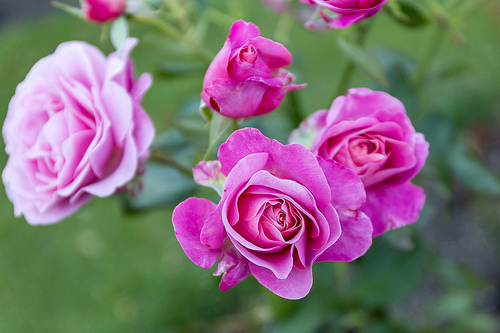

In [ ]:
img2

In [ ]:
img2 = image.load_img(r'/content/flowers/rose/11944957684_2cc806276e.jpg', target_size = (64, 64))

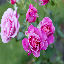

In [ ]:
img2

In [ ]:
x = image.img_to_array(img2)
x = np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x))
index = ['daisy','dandelion','rose','sunflower','tulip']
index[y]

1/1 [==============================] - 0s 24ms/step


'rose'

In [ ]:
img3 = image.load_img(r'/content/flowers/daisy/10466290366_cc72e33532.jpg',target_size=(64,64))

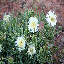

In [ ]:
img3

In [ ]:
x = image.img_to_array(img3)
x
x = np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x))
index = ['daisy','dandelion','rose','sunflower','tulip']
index[y]

1/1 [==============================] - 0s 31ms/step


'daisy'

In [ ]:
index = ['daisy','dandelion','rose','sunflower','tulip']

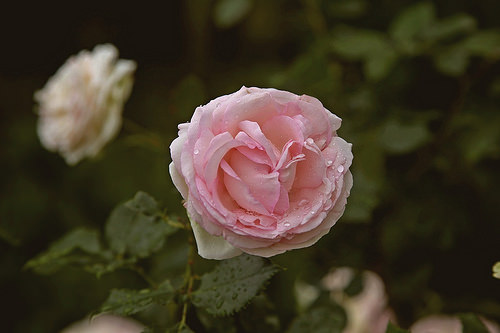

In [ ]:
img = image.load_img(r'/content/flowers/rose/15509799653_0562d4a4fa.jpg')
img

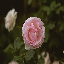

In [ ]:
img = image.load_img(r'/content/flowers/rose/15509799653_0562d4a4fa.jpg' , target_size = (64, 64))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x))
index = ['daisy','dandelion','rose','sunflower','tulip']
index[y]

1/1 [==============================] - 0s 24ms/step


'rose'